# Nuclei data exploration

In [58]:
import pandas as pd
import numpy as np
import zipfile
import re
from PIL import Image
from io import BytesIO
from collections import Counter
import matplotlib.pyplot as plt

## Init

In [16]:
train_zip = zipfile.ZipFile('./stage1_train.zip')

In [144]:
def load_png(png, zipped_pngs):
    png_data = zipped_pngs.read(png)
    return Image.open(BytesIO(png_data))


train_images = [(x[:64], load_png(x, train_zip)) for x in train_zip.namelist() if re.search(r'images/.', x)]
train_masks  = [(x[:64], load_png(x, train_zip)) for x in train_zip.namelist() if re.search(r'masks/.', x)]
train_images = pd.DataFrame(train_images, columns = ['hash', 'image'])
train_masks  = pd.DataFrame(train_masks, columns = ['hash', 'mask'])
train        = pd.merge(train_images, train_masks, 'outer', 'hash')

## Images features

In [145]:
train['size'] = train['image'].apply(lambda x : x.size)
train['area'] = train['size'].apply(lambda x : x[0] * x[1])
nuc_count = train['hash'].value_counts().to_frame('nuclei_count')
nuc_count['hash'] = nuc_count.index
train = pd.merge(train, nuc_count, on='hash')
train['density'] = train['nuclei_count'] / train['area']

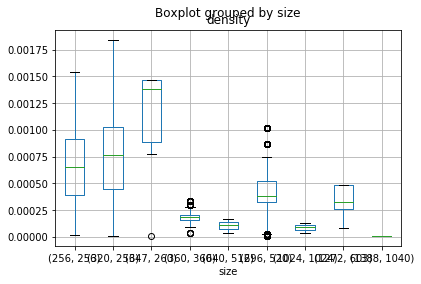

In [173]:
# density distrib by image area
train.sort_values('area').boxplot(column='density', by='size')

## Thought

Try a generalization test by isolating a class of images and predict on it